In [2]:
from datasets import load_dataset

/Users/jacob/miniconda3/envs/torch/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
dataset = load_dataset("ms_marco", "v1.1")

In [4]:
dataset

DatasetDict({
    validation: Dataset({
        features: ['answers', 'passages', 'query', 'query_id', 'query_type', 'wellFormedAnswers'],
        num_rows: 10047
    })
    train: Dataset({
        features: ['answers', 'passages', 'query', 'query_id', 'query_type', 'wellFormedAnswers'],
        num_rows: 82326
    })
    test: Dataset({
        features: ['answers', 'passages', 'query', 'query_id', 'query_type', 'wellFormedAnswers'],
        num_rows: 9650
    })
})

In [5]:
dataset['train']

Dataset({
    features: ['answers', 'passages', 'query', 'query_id', 'query_type', 'wellFormedAnswers'],
    num_rows: 82326
})

In [13]:
# print(max(len(answer) for answer in dataset['validation']['query']))

# find the index of the longest query
index_of_longest_query = max(range(len(dataset['validation']['query'])), key = lambda index: len(dataset['validation']['query'][index]))

# print the longest query
print(dataset['validation']['query'][index_of_longest_query])


what is the general name of the group of hormones produced by the anterior pituitary than then exert an effect on target organs to produce another hormone


In [18]:
str0 = 'what is the general name of the group of hormones produced by the anterior pituitary than then exert an effect on target organs to produce another hormone'
str1 = str0.split(' ')
len(str1)

27

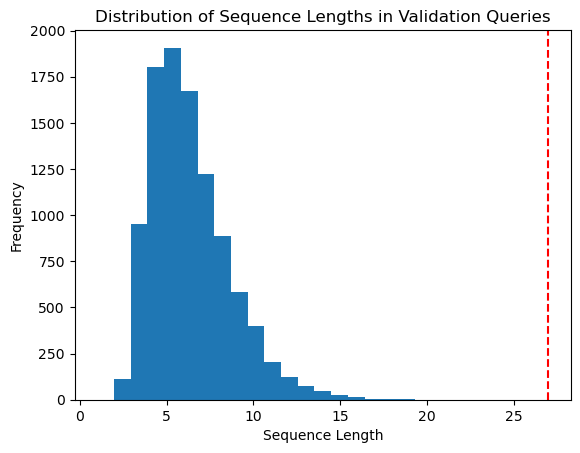

In [25]:
import matplotlib.pyplot as plt

# calculate sequence lengths
sequence_lengths = [len(query.split(' ')) for query in dataset['validation']['query']]

# plot histogram
plt.hist(sequence_lengths, bins=27)
# plot horizontal line for the longest query
plt.axvline(x=len(str1), color='r', linestyle='--')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.title('Distribution of Sequence Lengths in Validation Queries')
plt.show()


In [28]:
combined_queries = dataset['validation']['answers'] + dataset['test']['answers'] + dataset['train']['answers']


In [31]:
combined_queries = [' '.join(query) for query in combined_queries]


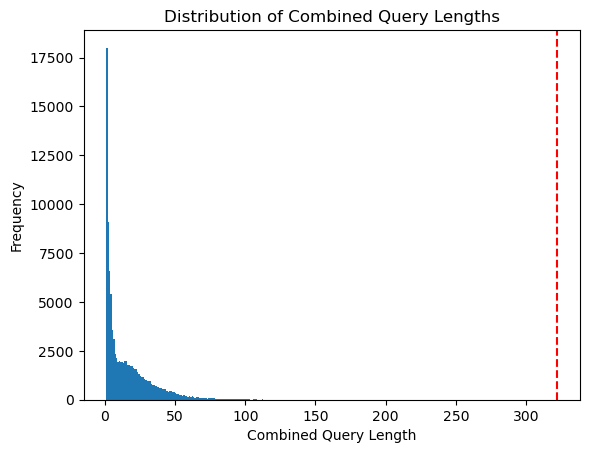

In [42]:
# calculate lengths of combined queries
combined_query_lengths = [len(query.split(' ')) for query in combined_queries]

# plot histogram
plt.hist(combined_query_lengths, bins=max(combined_query_lengths))
plt.axvline(x=max(combined_query_lengths), color='r', linestyle='--')
plt.xlabel('Combined Query Length')
plt.ylabel('Frequency')
plt.title('Distribution of Combined Query Lengths')
plt.show()


In [51]:
max(combined_query_lengths)


322

In [49]:
# max(combined_query_lengths)
sorted_combined_query_lengths = sorted(set(combined_query_lengths))
second_max = sorted_combined_query_lengths[-2]
print(second_max)


209


In [43]:
index_combined_query_lengths = max(range(len(combined_query_lengths)), key = lambda index: combined_query_lengths[index])

In [47]:
# combined_queries[index_combined_query_lengths]

second_max_sent = [combined_queries[i] for i in range(len(combined_query_lengths)) if combined_query_lengths[i] == second_max]

In [48]:
second_max_sent

['The central nervous system consisting of the brain and spinal cord. These structures are protected by bone and cushioned from injury by the cerebrospinal fluid (CSF). Its function is 1 Sensory nerves gather information from inside the body and the outside environment. 2 The nerves then carry the information to central nervous system (CNS). Sensory nerves gather information from inside the body and the outside environment. 3 Sensory information brought to the CNS is processed and interpreted. 4 Motor nerves convey information from the CNS to the muscles and the glands of the body. Function: The nervous system has three general functions: a sensory function, an interpretative function and a motor function. 1 Sensory nerves gather information from inside the body and the outside environment. 2 The nerves then carry the information to central nervous system (CNS). Sensory nerves gather information from inside the body and the outside environment. 2 The nerves then carry the information t